In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [4]:
tf.__version__

'1.0.0'

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [5]:
data.test.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [6]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [8]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])
data.test.cls[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [22]:
i_size=28 #as mnist pic size is 28*28
size=i_size*i_size
shape=(i_size,i_size)#tuple with eight and width
nc=10

In [23]:
def plot(images, cls_true, cls_pred=None):
    assert len(images)==len(cls_true)==9
    fig,axes=plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3,wspace=0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(shape),cmap='binary')
        #fn of cmap :if img were an array of shape (M,N), then the cmap controls the colormap used to display the values.
        if cls_pred is None:
            xlabel="True: {0}".format(cls_true[i])
        else:
            xlabel="True: {0}, Pred: {1}".format(cls_true[i],cls_pred[i])
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])#removing ticks
        ax.set_yticks([])

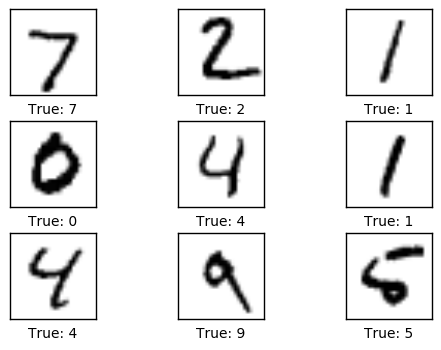

In [24]:
images=data.test.images[0:9]
cls_true=data.test.cls[0:9]
plot(images=images, cls_true=cls_true)

In [28]:
x = tf.placeholder(tf.float32, [None,size])
y_true = tf.placeholder(tf.float32, [None, nc])
y_true_cls = tf.placeholder(tf.int64, [None])

In [31]:
w=tf.Variable(tf.zeros([size,nc]))#weights
b=tf.Variable(tf.zeros([nc]))#biases

In [32]:
logits=tf.matmul(x,w)+b
#matmul=matrix multiplication
logits

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [34]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [36]:
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)
cross_entropy

<tf.Tensor 'Reshape_5:0' shape=(?,) dtype=float32>

In [37]:
cost=tf.reduce_mean(cross_entropy)
cost

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [38]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [39]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
#tf.equal is just like a if statement
accuracy=tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Now starts the actual calculation

In [42]:
session=tf.Session()

In [44]:
session.run(tf.global_variables_initializer())

In [64]:
batch_size=200

In [65]:
def optimize(n_iter):
    for i in range(n_iter):
        xb,yt=data.train.next_batch(batch_size)
        dict_train={x:xb, y_true:yt}
    session.run(optimizer,feed_dict=dict_train)

In [66]:
feed_dict_test={x: data.test.images,
               y_true: data.test.labels,
               y_true_cls: data.test.cls}
def print_accuracy():
    acc=session.run(accuracy, feed_dict=feed_dict_test)
    print("accuracy on te test set is : {0:.1%}".format(acc))

In [86]:
def print_confusion_matrix():
    cls_true=data.test.cls
    cls_pred=session.run(y_pred_cls, feed_dict=feed_dict_test)
    cm=confusion_matrix(y_true=cls_true,
                       y_pred=cls_pred)
    print(cm)
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks=np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

In [68]:
def plot_errors():
    correct,cls_pred=session.run([correct_prediction, y_pred_cls],feed_dict=feed_dict_test)
    incorrect=(correct== False)
    images=data.test.images[incorrect]
    cls_pred=cls_pred[incorrect]
    cls_true=data.test.cls[incorrect]
    plot(images=images[0:9],cls_true=cls_true[0:9],
               cls_pred=cls_pred[0:9])
    

In [78]:
def plot_weights():
    wt=session.run(w)#getting value from tf var declared above
    w_min=np.min(wt)
    w_max=np.max(wt)
    fig,axes=plt.subplots(3,4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        if i<10:
            image=wt[:, i].reshape(shape)
            ax.set_xlabel("Weights: {0}".format(i))
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_xticks([])
        ax.set_yticks([])

In [70]:
print_accuracy()

accuracy on te test set is : 9.8%


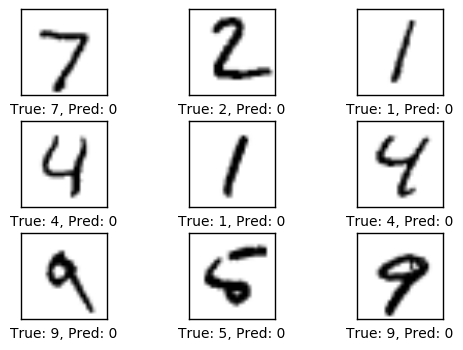

In [71]:
plot_errors()

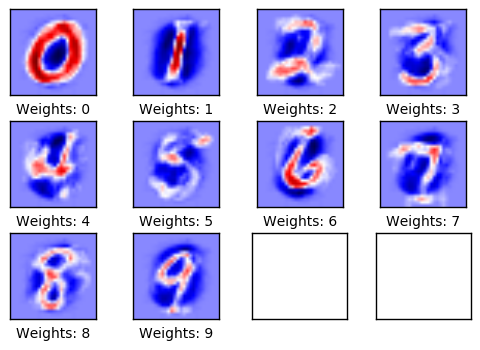

In [79]:
plot_weights()

In [74]:
optimize(n_iter=9)

In [75]:
print_accuracy()


accuracy on te test set is : 27.9%


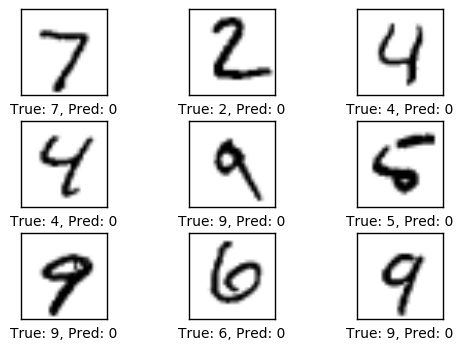

In [76]:
plot_errors()

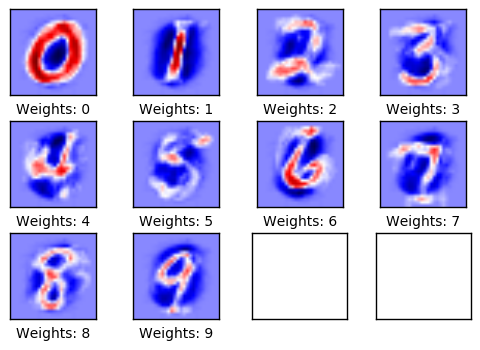

In [80]:
plot_weights()

In [81]:
optimize(n_iter=900)

In [82]:
print_accuracy()

accuracy on te test set is : 52.8%


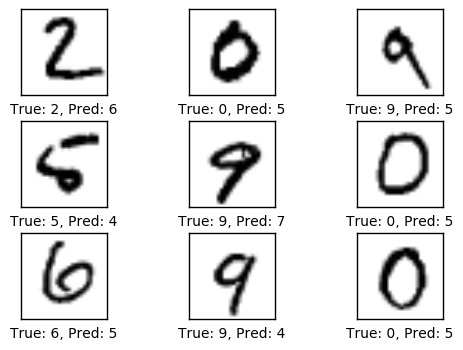

In [83]:
plot_errors()

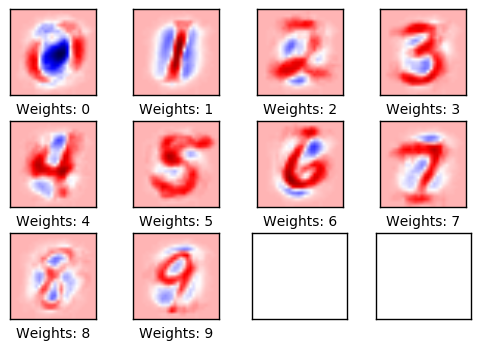

In [84]:
plot_weights()

[[  0   0   2   8   5 881  83   1   0   0]
 [  0 913  99   3   3 109   7   1   0   0]
 [  0   7 478  87  81 220 150   9   0   0]
 [  0   0   4 480   6 502   7  10   0   1]
 [  0   1   0   2 884  36  54   5   0   0]
 [  0   2   1   9  25 828  24   3   0   0]
 [  0   2   4   0  42  47 863   0   0   0]
 [  0  15  23  10  87  70   1 822   0   0]
 [  0   1   4  14  35 895  18   7   0   0]
 [  0   2   0  15 675 197   8 101   0  11]]


NameError: name 'num_classes' is not defined

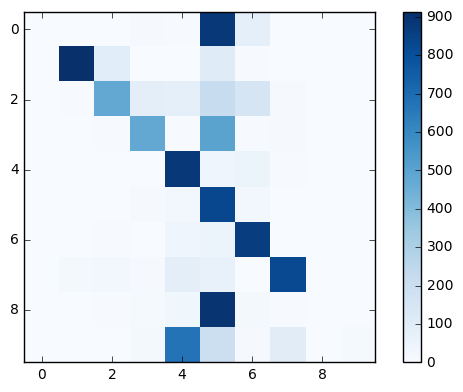

In [87]:
print_confusion_matrix()
